<a href="https://colab.research.google.com/github/codeworks-data/tensorflow-workshop/blob/main/Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on : https://towardsdatascience.com/fast-neural-style-transfer-in-5-minutes-with-tensorflow-hub-magenta-110b60431dcc

## Imports

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt

## Get input images

In [2]:
content_path = tf.keras.utils.get_file('photo-1586671267731-da2cf3ceeb80', 
                                       'https://images.unsplash.com/photo-1586671267731-da2cf3ceeb80')

In [3]:
style_path = tf.keras.utils.get_file('1280px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg',
                                     'https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/1280px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg')

## Image scaling 

In [4]:
def img_scaler(image, max_dim = 512):

  # Casts a tensor to a new type.
  original_shape = tf.cast(tf.shape(image)[:-1], tf.float32)

  # Creates a scale constant for the image
  scale_ratio = max_dim / max(original_shape)

  # Casts a tensor to a new type.
  new_shape = tf.cast(original_shape * scale_ratio, tf.int32)

  # Resizes the image based on the scaling constant generated above
  return tf.image.resize(image, new_shape)

## Preprocessing image

In [5]:
def load_img(path_to_img):

  # Reads and outputs the entire contents of the input filename.
  img = tf.io.read_file(path_to_img)

  # Detect whether an image is a BMP, GIF, JPEG, or PNG, and 
  # performs the appropriate operation to convert the input 
  # bytes string into a Tensor of type dtype
  img = tf.image.decode_image(img, channels=3)

  # Convert image to dtype, scaling (MinMax Normalization) its values if needed.
  img = tf.image.convert_image_dtype(img, tf.float32)

  # Scale the image using the custom function we created
  img = img_scaler(img)

  # Adds a fourth dimension to the Tensor because
  # the model requires a 4-dimensional Tensor
  return img[tf.newaxis, :]

## Load images

In [6]:
content_image = load_img(content_path)
style_image = load_img(style_path)

## Show images

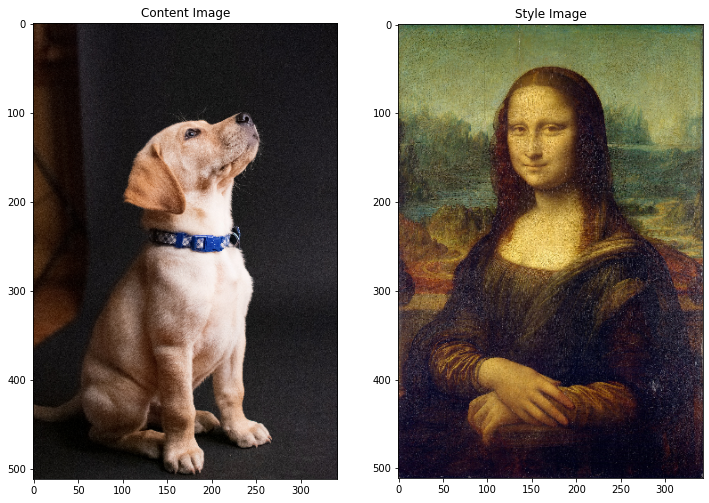

In [7]:
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(content_image[0])
plt.title('Content Image')
plt.subplot(1, 2, 2)
plt.imshow(style_image[0])
plt.title('Style Image')

plt.show()

## Load trained model from Tensorflow Hub

In [8]:
# Load Magenta's Arbitrary Image Stylization network from TensorFlow Hub  
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')

## Transfer style

In [9]:
# Pass content and style images as arguments in TensorFlow Constant object format
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]

## Show resulting image

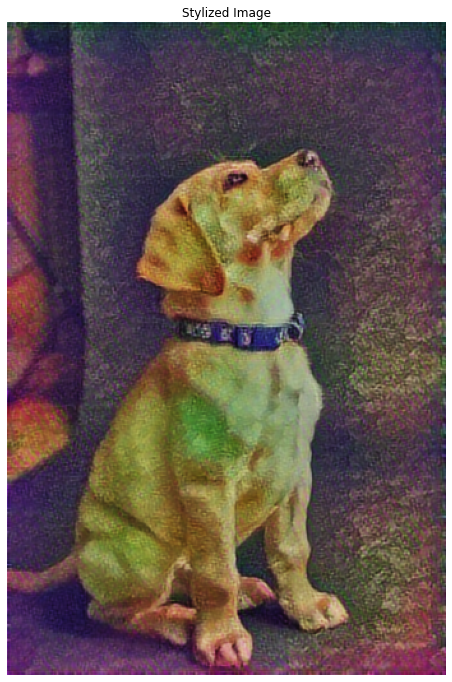

In [10]:
# Set the size of the plot figure
plt.figure(figsize=(12, 12))

# Plot the stylized image
plt.imshow(stylized_image[0])

# Add title to the plot
plt.title('Stylized Image')

# Hide axes
plt.axis('off')

# Show the plot
plt.show()

## Example 2

In [5]:
style_path = tf.keras.utils.get_file('delacroix+laliberteguidantlepeuple.jpg',
                                     'http://1.bp.blogspot.com/-nQTWWoCAM40/USKWqulOApI/AAAAAAAAA1U/tCogYaygLkc/s1600/delacroix+laliberteguidantlepeuple.jpg')

content_path = tf.keras.utils.get_file('photo-1549884002-16e635ebc31d', 
                                       'https://images.unsplash.com/photo-1549884002-16e635ebc31d')

In [6]:
content_image = load_img(content_path)
style_image = load_img(style_path)

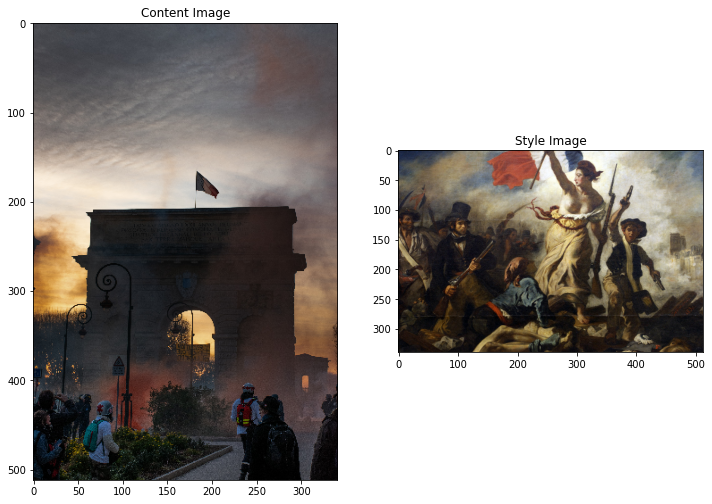

In [7]:
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(content_image[0])
plt.title('Content Image')
plt.subplot(1, 2, 2)
plt.imshow(style_image[0])
plt.title('Style Image')

plt.show()

In [8]:
# Pass content and style images as arguments in TensorFlow Constant object format
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]

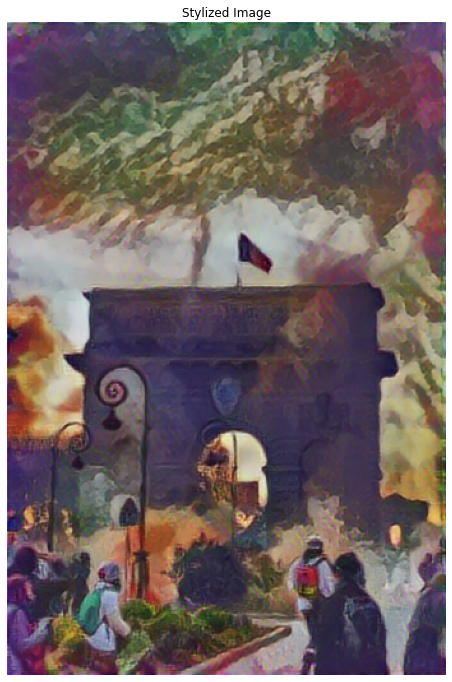

In [9]:
# Set the size of the plot figure
plt.figure(figsize=(12, 12))

# Plot the stylized image
plt.imshow(stylized_image[0])

# Add title to the plot
plt.title('Stylized Image')

# Hide axes
plt.axis('off')

# Show the plot
plt.show()

## Example 3

In [10]:
content_path = tf.keras.utils.get_file('photo-1589656966895-2f33e7653819', 
                                       'https://images.unsplash.com/photo-1589656966895-2f33e7653819')
style_path = tf.keras.utils.get_file('marvel-comics-infinity-retro-i71856.jpg',
                                     'https://static.posters.cz/image/1300/affiches-et-posters/marvel-comics-infinity-retro-i71856.jpg')

In [11]:
content_image = load_img(content_path)
style_image = load_img(style_path)

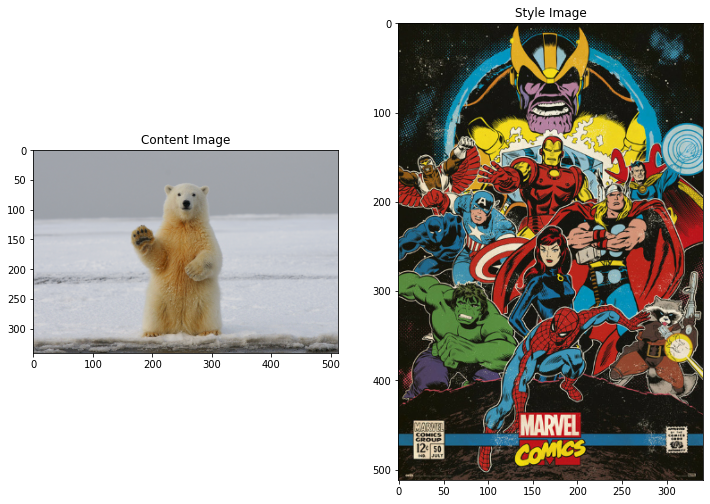

In [12]:
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(content_image[0])
plt.title('Content Image')
plt.subplot(1, 2, 2)
plt.imshow(style_image[0])
plt.title('Style Image')

plt.show()

In [13]:
# Pass content and style images as arguments in TensorFlow Constant object format
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]

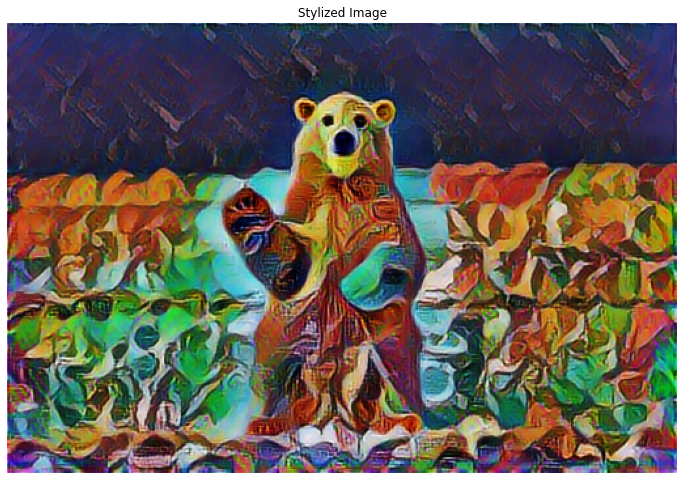

In [14]:
# Set the size of the plot figure
plt.figure(figsize=(12, 12))

# Plot the stylized image
plt.imshow(stylized_image[0])

# Add title to the plot
plt.title('Stylized Image')

# Hide axes
plt.axis('off')

# Show the plot
plt.show()